In [1]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi

In [80]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list,leg_list,title_x):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    # ax = plt.subplot(111, polar=True)
    ax = plt.subplot(1,1,1, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    # plt.legend( bbox_to_anchor=(0, 1))
# leg_list=["RF-core","RF-hAIkal"] 
    plt.legend(leg_list,title=title_x,bbox_to_anchor=(0, 1))

#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
#     plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    # plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")
    # return ax

In [3]:
def reorder_df(dataframe):
    new_cols = dataframe.loc["Classifier"].values
    # print(new_cols)
    dataframe = dataframe[1:]
    dataframe.columns = new_cols
    dataframe.index.name = "Metrics" 
    return dataframe

In [4]:
def read_my_data(file):
    columns_1 =['Classifier','Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
    df = pd.read_csv(file,)
    df.columns= columns_1
    df = df.T
    df = reorder_df(df)
    return df

In [13]:
def new_column_order(df):
    df = df.T
    new_cols =['Acc', 'R_inc', 'R_cor', 'P_inc', 'P_cor', 'F1_inc', 'F1_cor', 'MCC']
    df = df[new_cols]
    df = df.T
    return df

In [5]:
df_haikal_test_set_bal = pd.read_csv("../data/balanced_test_set_haikal.csv")
df_haikal_test_set_unb = pd.read_csv("../data/unbalanced_test_set_haikal.csv")
df_haikal_validation_set_bal = pd.read_csv("../data/balanced_validation_set_haikal.csv")
df_haikal_validation_set_unb = pd.read_csv("../data/unbalanced_validation_set_haikal.csv")

df_TF2_haikal_validation_unb = read_my_data("../data/TF2_validation_metrics.csv")
df_TF2_haikal_validation_bal = read_my_data("../data/TF2_validation_metrics_balanced.csv")
df_TF2_haikal_test_unb = read_my_data("../data/TF2_test_metrics.csv")
df_TF2_haikal_test_bal = read_my_data("../data/TF2_test_metrics_balanced.csv")



In [6]:
df_haikal_test_set_bal.set_index("Metrics",inplace=True)
df_haikal_test_set_unb.set_index("Metrics",inplace=True)
df_haikal_validation_set_bal.set_index("Metrics",inplace=True)
df_haikal_validation_set_unb.set_index("Metrics",inplace=True)

In [7]:
TF2_models =["TF2_models_snorkel_trained_32_0.5_adam.h5","TF2_models_snorkel_trained_16_0.5_adam.h5", "TF2_models_snorkel_trained_8_0.5_adam.h5"] 

df_haikal_test_set_unb = pd.concat( [ df_haikal_test_set_unb, df_TF2_haikal_test_unb[TF2_models] ], axis=1 )
                                
df_haikal_test_set_bal = pd.concat([df_haikal_test_set_bal, df_TF2_haikal_test_bal[TF2_models] ], axis=1 )

df_haikal_validation_set_bal = pd.concat([df_haikal_validation_set_bal,df_TF2_haikal_validation_bal[TF2_models] ], axis=1)

df_haikal_validation_set_unb = pd.concat([df_haikal_validation_set_unb, df_TF2_haikal_validation_unb[TF2_models]] , axis =1 )  

In [8]:
new_cols_val =['Perceptron_Ori','Perceptron_hAIkal','TF2_Ori','TF2_hAIkal','RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up','TF2_HP_hAIkal_32','TF2_HP_hAIkal_16','TF2_HP_hAIkal_8']
new_cols_test =['Perceptron_Ori','Perceptron_hAIkal','TF2_Ori','TF2_hAIkal','RF_Score_set','hAIkal_Score_set','TF2_HP_hAIkal_32','TF2_HP_hAIkal_16','TF2_HP_hAIkal_8']
df_haikal_test_set_bal.columns = new_cols_test
df_haikal_test_set_unb.columns = new_cols_test 
df_haikal_validation_set_unb.columns = new_cols_val
df_haikal_validation_set_bal.columns = new_cols_val

In [9]:
df_haikal_test_set_bal

,Perceptron_Ori,Perceptron_hAIkal,TF2_Ori,TF2_hAIkal,RF_Score_set,hAIkal_Score_set,TF2_HP_hAIkal_32,TF2_HP_hAIkal_16,TF2_HP_hAIkal_8
Metrics,,,,,,,,,
Acc,0.7937,0.7723,0.7922,0.8020,0.7502,0.8070,0.7727,0.7732,0.8138
F1_cor,0.8239,0.8117,0.8193,0.8309,0.7975,0.8295,0.7231,0.8121,0.8335
F1_inc,0.7511,0.7121,0.7556,0.7613,0.6741,0.7777,0.8072,0.7139,0.7887
P_cor,0.7192,0.6923,0.7253,0.7256,0.6709,0.7434,0.925,0.6931,0.7536
P_inc,0.9457,0.9672,0.9161,0.9573,0.9680,0.9160,0.7007,0.9666,0.9113
R_cor,0.9643,0.9809,0.9412,0.9718,0.9829,0.9382,0.5935,0.9805,0.9323
R_inc,0.6229,0.5634,0.6430,0.6319,0.5171,0.6757,0.9519,0.5659,0.6952
MCC,0.6248,0.5992,0.6121,0.6421,0.5652,0.6363,0.5842,0.6004,0.646


In [17]:

df_haikal_test_set_bal = new_column_order(df_haikal_test_set_bal)
df_haikal_test_set_unb = new_column_order(df_haikal_test_set_unb)
df_haikal_validation_set_unb = new_column_order(df_haikal_validation_set_unb)
df_haikal_validation_set_bal = new_column_order(df_haikal_validation_set_bal)

black RF_Score_set
gold hAIkal_Score_set


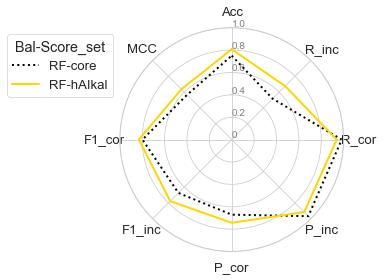

In [18]:
my_selection = ['RF_Score_set','hAIkal_Score_set']
my_title = "Bal-Score_set"
uno  = plot_radar(df_haikal_test_set_bal[my_selection].T,
           "figure_haikal_test_bal_RFC",
           ['black','gold'],
           ['dotted','solid'], ["RF-core","RF-hAIkal"] , 
           my_title
           )

black RF_Score_set
gold hAIkal_Score_set


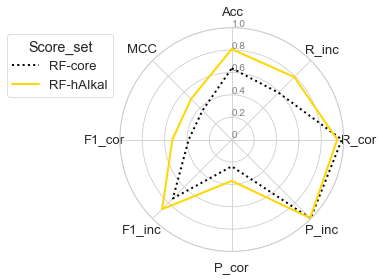

In [19]:
my_title = "Score_set"

dos = plot_radar(df_haikal_test_set_unb[['RF_Score_set','hAIkal_Score_set']].T,
           "figure_haikal_test_unb_RFC",
           ['black','gold'],
           ['dotted','solid'],
           ["RF-core","RF-hAIkal"]
              ,my_title)


black RF_3K-BM4/5-up
orange hAIkal_3K-BM4/5-up


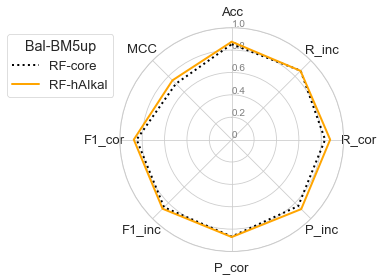

In [20]:
my_title = "Bal-BM5up"
tres= plot_radar(df_haikal_validation_set_bal[['RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up']].T,
           "figure_haikal_validation_unb_RFC",
           ['black','orange'],
           ['dotted','solid'],
           ["RF-core","RF-hAIkal"]
                ,my_title)

black RF_3K-BM4/5-up
orange hAIkal_3K-BM4/5-up


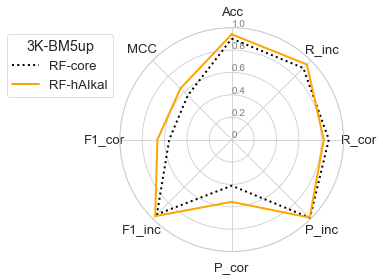

In [21]:
my_title = "3K-BM5up"
cuatro = plot_radar(df_haikal_validation_set_unb[['RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up']].T,
           "figure_haikal_validation_unb_RFC",
           ['black','orange'],
           ['dotted','solid'],
              ["RF-core","RF-hAIkal"],
              my_title)

In [39]:
## source code ##
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/ 

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def spider_multiplot( df, row, title, color,i ):

    categories = df["group"].values.tolist() ### original line 
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,i+1, polar=True )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)

    # Ind1
#     values=df.loc[row].drop('group').values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, color=color, alpha=0.4)

    
    # df2 = df[['Accuracy','Recall cor','Recall inc','Precision cor','Precision inc','MCC']].T
#     print (df2.loc["Accuracy"])

    # print (df2.iloc['Accuracy'])
    values=df.loc[0].drop('group').values.flatten().tolist()
    # values=df2.loc[row].values.flatten().tolist()

    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)




TypeError: 'GridSpec' object does not support item assignment

<Figure size 720x720 with 0 Axes>

In [40]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

In [41]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [44]:
my_selection_test = ['RF_Score_set','hAIkal_Score_set']
my_selection_validation = ['RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up']
# concat the dataframes
df_haikal = pd.concat([
df_haikal_test_set_bal[my_selection_test] , 
df_haikal_test_set_unb[my_selection_test] , 
df_haikal_validation_set_unb[my_selection_validation] , 
df_haikal_validation_set_bal[my_selection_validation]], axis=1)

In [48]:
df_haikal.columns = ['RF_Score_set_bal','hAIkal_Score_set_bal', 'RF_Score_set_unb','hAIkal_Score_set_unb', 'RF_3K-BM4/5-up_unb','hAIkal_3K-BM4/5-up_unb', 'RF_3K-BM4/5-up_bal','hAIkal_3K-BM4/5-up_bal']

In [65]:
df_haikal.reset_index(inplace=True) 
df_haikal 

,Metrics,RF_Score_set_bal,hAIkal_Score_set_bal,RF_Score_set_unb,hAIkal_Score_set_unb,RF_3K-BM4/5-up_unb,hAIkal_3K-BM4/5-up_unb,RF_3K-BM4/5-up_bal,hAIkal_3K-BM4/5-up_bal
0,Acc,0.7502,0.807,0.6376,0.808,0.9024,0.9407,0.8527,0.8744
1,R_inc,0.5171,0.6757,0.5925,0.7905,0.905,0.9498,0.8711,0.8692
2,R_cor,0.9829,0.9382,0.9843,0.9431,0.8677,0.8228,0.8343,0.8797
3,P_inc,0.968,0.916,0.9966,0.9907,0.9889,0.9859,0.8402,0.8784
4,P_cor,0.6709,0.7434,0.2389,0.3691,0.4118,0.5564,0.8662,0.8706
5,F1_inc,0.6741,0.7777,0.7432,0.8793,0.9451,0.9675,0.8554,0.8738
6,F1_cor,0.7975,0.8295,0.3845,0.5305,0.5585,0.6639,0.8499,0.8751
7,MCC,0.5652,0.6363,0.3685,0.5137,0.5565,0.6473,0.7059,0.7489


In [94]:
df_haikal.T

,0,1,2,3,4,5,6,7
Metrics,Acc,R_inc,R_cor,P_inc,P_cor,F1_inc,F1_cor,MCC
RF_Score_set_bal,0.7502,0.5171,0.9829,0.968,0.6709,0.6741,0.7975,0.5652
hAIkal_Score_set_bal,0.807,0.6757,0.9382,0.916,0.7434,0.7777,0.8295,0.6363
RF_Score_set_unb,0.6376,0.5925,0.9843,0.9966,0.2389,0.7432,0.3845,0.3685
hAIkal_Score_set_unb,0.808,0.7905,0.9431,0.9907,0.3691,0.8793,0.5305,0.5137
RF_3K-BM4/5-up_unb,0.9024,0.905,0.8677,0.9889,0.4118,0.9451,0.5585,0.5565
hAIkal_3K-BM4/5-up_unb,0.9407,0.9498,0.8228,0.9859,0.5564,0.9675,0.6639,0.6473
RF_3K-BM4/5-up_bal,0.8527,0.8711,0.8343,0.8402,0.8662,0.8554,0.8499,0.7059
hAIkal_3K-BM4/5-up_bal,0.8744,0.8692,0.8797,0.8784,0.8706,0.8738,0.8751,0.7489


In [89]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=df_haikal.T.index.to_list()
    N = len(categories)
    

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)


    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)

    # Ind1
    # values=df.loc[row].drop('group').values.flatten().tolist()
    values = df_haikal.T.loc[row].drop("Metrics").values.flatten().tolist()

    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

Acc
R_inc
R_cor
P_inc
P_cor
F1_inc
F1_cor
MCC


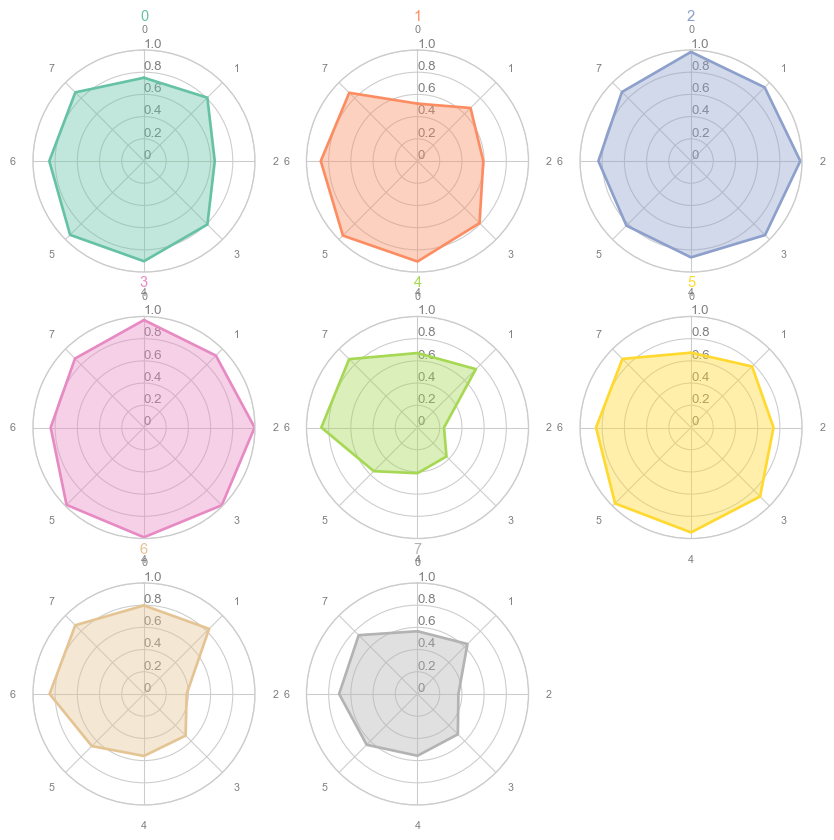

In [93]:
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_haikal.index))
 
# Loop to plot
for row,i in enumerate(df_haikal.index):
    # print(df_haikal.loc[row]["Metrics"])
    df_haikal.columns.to_list()
    make_spider( row=row, title=i, color=my_palette(row))

# for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
#     print (i,row)
#     values = dataframe.loc[row].values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)

black RF_Score_set
gold hAIkal_Score_set


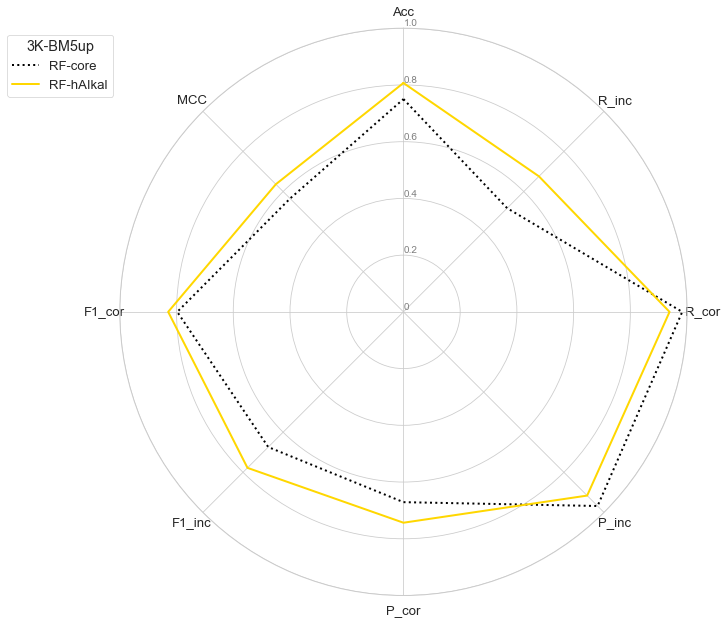

In [88]:
# initialize the figure
import numpy as np
my_dpi=96
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

fig, axs = plt.subplots(2,2, figsize=(10,10), subplot_kw=dict(projection='polar'))
# axs[0,0].plot(x, y ** 2)
axs[0,0] = (  plot_radar(df_haikal_test_set_bal[my_selection].T,
           "figure_haikal_test_bal_RFC",
           ['black','gold'],
           ['dotted','solid'], ["RF-core","RF-hAIkal"] , 
           my_title
           ))
# axs [0,1] =  plot_radar(df_haikal_test_set_unb[['RF_Score_set','hAIkal_Score_set']].T,
#            "figure_haikal_test_unb_RFC",
#            ['black','gold'],
#            ['dotted','solid'],
#            ["RF-core","RF-hAIkal"]
#               ,my_title)
# axs[1,0] =  plot_radar(df_haikal_validation_set_bal[['RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up']].T,
#            "figure_haikal_validation_unb_RFC",
#            ['black','orange'],
#            ['dotted','solid'],
#            ["RF-core","RF-hAIkal"]
#                 ,my_title)
# axs[1,1] =  plot_radar(df_haikal_validation_set_unb[['RF_3K-BM4/5-up','hAIkal_3K-BM4/5-up']].T,
#            "figure_haikal_validation_unb_RFC",
#            ['black','orange'],
#            ['dotted','solid'],
#               ["RF-core","RF-hAIkal"],
#               my_title)
plt.show()

<PolarAxesSubplot:title={'center':'Bal-Score_set'}>